In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
import utils as ut
import matplotlib.pyplot as plt

from sklearn import preprocessing

from tqdm import tqdm

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer

import pickle

import time
#import tensorflow_addons as tfa
inicio = time.time()

2022-06-17 13:05:44.426532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-17 13:05:44.426559: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
patience = 20
EPOCHS = 100
batch_size = 64
save_model = True

t_aprendizado_search = range(1, 100, 10)
momentum_search = range(1, 100, 5)

In [3]:
PATH = '../data/water_potability.csv'
label_column='Potability'
have_classes=True
drop_columns_list=['Id']
drop_columns=True
dropna=False

df, df_one_hot, X, y, classes, columns = ut.clean_data(PATH=PATH, shuffle=True, label_column=label_column, drop_columns_list=drop_columns_list, drop_columns=drop_columns, have_classes=have_classes, dropna=dropna)
df

NaN = **1434** will be categorized under feature_nan columns
NaN = **1434** will be categorized under feature_nan columns


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1378,7.499844,210.985034,23707.465304,7.148518,NaN,484.843340,18.081957,52.967469,4.454477,0
2409,5.678221,143.186508,18377.008261,7.145335,418.247228,359.774711,18.714478,77.447639,5.429782,1
2877,9.871791,114.371450,27912.908263,8.660269,340.046298,490.451835,8.517762,64.831248,3.652264,0
2397,7.555823,190.461917,29411.628645,7.868878,349.948941,524.465999,19.408144,79.555593,4.099169,1
1333,NaN,152.507679,11398.731105,8.728973,400.669601,385.335804,11.676601,58.600940,5.444927,0
...,...,...,...,...,...,...,...,...,...,...
727,6.017261,206.014400,15157.268787,7.582124,307.704474,431.781987,14.221757,53.319977,4.427712,1
721,3.633163,179.350577,28584.175810,5.246382,292.440536,500.866018,8.956401,77.360985,3.349572,1
2389,7.476690,162.008703,22171.318898,9.611599,NaN,401.234815,14.993740,82.861764,4.195539,1
2462,6.020995,178.500297,13095.149161,7.944802,NaN,437.298995,13.770783,59.872433,4.806017,0


In [4]:
X =  preprocessing.scale(X, with_mean='False')
y = np.array(y)
X = np.array(X)

imputer = KNNImputer()
imputer.fit(X)
X = imputer.transform(X)

In [5]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),

    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

#precision = tf.keras.metrics.Precision()
#recall = tf.keras.metrics.Recall()
#f1_score = tfa.metrics.F1Score(num_classes=1, threshold=0.5)

earlystopper = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patience, restore_best_weights=True, verbose=0)

#opt=tf.keras.optimizers.SGD(learning_rate=t_aprendizado, momentum=momentum)
#opt = 'adam'
#opt = tf.keras.optimizers.RMSprop()
#opt = 'rmsprop'#<---

#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

#history = model.fit (X, y, validation_split=0.1, batch_size=batch_size, epochs=EPOCHS, callbacks=[earlystopper], verbose=0)


results = []
results.append(['loss', 'acc', 'learning_rate', 'momentum'])

soma_acc = 0

soma_loss = 0

for i in tqdm(t_aprendizado_search):
    for j in momentum_search:
        for _ in range(5):

            model.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.SGD(learning_rate=i/100, momentum=j/100) , metrics=['acc'])

            history = model.fit (X, y, batch_size=batch_size, epochs=EPOCHS, callbacks=[earlystopper], verbose=0)

            loss, acc = model.evaluate(X, y, verbose=0)
            
            soma_acc += acc
            
            soma_loss += loss
        
        results.append([soma_loss/5, soma_acc/5, i/100, j/100])
        soma_loss = 0
        soma_acc = 0
        

2022-06-17 13:05:47.728883: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-17 13:05:47.728913: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-17 13:05:47.728950: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lasid30): /proc/driver/nvidia/version does not exist
2022-06-17 13:05:47.729216: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
100%|██████████| 10/10 [6:49:38<00:00, 2457.83s/it] 


In [6]:
def save_data(save_name, data):
    pickle_out = open(save_name+"-pickle.pickle","wb")
    print('Arquivo gravado como: '+save_name+"-pickle.pickle")
    pickle.dump(data, pickle_out)
    pickle_out.close()

save_data('historico/historico5x-no-validate', results)

Arquivo gravado como: historico/historico5x-no-validate-pickle.pickle


In [7]:
loss, acc = model.evaluate(X, y, verbose=1)

predicoes = model.predict(X)

predicoes = predicoes > 0.5

103/103 [==============================] - 0s 3ms/step - loss: 0.6689 - acc: 0.6099


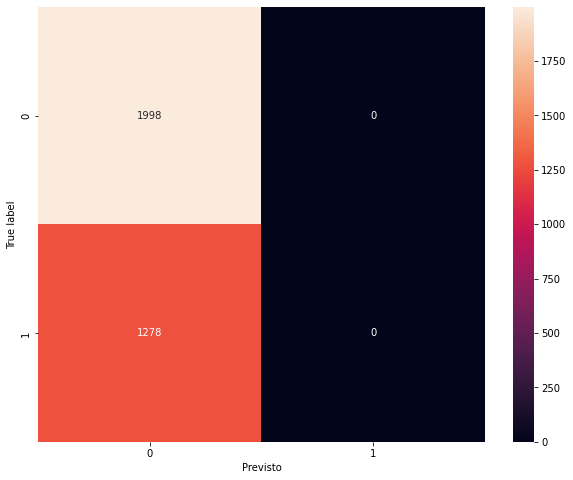

In [8]:
confusion_mtx = confusion_matrix(y, predicoes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=['0','1'], yticklabels=['0','1'], annot=True, fmt='g')
plt.xlabel('Previsto')
plt.ylabel('True label')
plt.show()

In [9]:
print(model.evaluate(X, y, verbose=0))

[0.6689179539680481, 0.6098901033401489]


In [10]:
if save_model:
    nome_saida = f'models/model | acc - {acc}.h5'
    #nome_saida = caminho_modelo+nome+'.h5'
    model.save(nome_saida)
    print('Salvo como: ',nome_saida)
print('Tempo de execução: ', time.time() - inicio)

Salvo como:  models/model | acc - 0.6098901033401489.h5
Tempo de execução:  24580.757887601852


In [13]:
def sort_func(item):
    return item[1]
print(results[0])
results = results[1:-1]
results.sort(key=sort_func, reverse=True)
for i in range(len(results)):
    print(results[i])

['loss', 'acc', 'learning_rate', 'momentum']
[0.422129225730896, 0.9667277097702026, 0.01, 0.26]
[0.4384466946125031, 0.9660561680793762, 0.01, 0.31]
[0.463212776184082, 0.9567765593528748, 0.01, 0.36]
[0.5043510019779205, 0.9525030493736267, 0.01, 0.46]
[0.5093953609466553, 0.9492673873901367, 0.01, 0.51]
[0.5444848656654357, 0.9478021860122681, 0.01, 0.56]
[0.43886866569519045, 0.9470085501670837, 0.01, 0.16]
[0.5154917359352111, 0.9470085501670837, 0.01, 0.41]
[0.4589056193828583, 0.9458485960960388, 0.01, 0.21]
[0.5916949510574341, 0.9424908280372619, 0.01, 0.66]
[0.5911187171936035, 0.9361416339874268, 0.01, 0.61]
[0.6300779104232788, 0.9246642112731933, 0.01, 0.01]
[0.45383912324905396, 0.9239926815032959, 0.01, 0.06]
[0.5005413115024566, 0.923931622505188, 0.01, 0.11]
[0.6409561157226562, 0.9163614273071289, 0.01, 0.71]
[0.663295841217041, 0.9096459031105042, 0.01, 0.76]
[0.6674344897270202, 0.8471306562423706, 0.01, 0.81]
[0.635469388961792, 0.765201461315155, 0.01, 0.86]
[0.61